<a href="https://colab.research.google.com/github/GitHub-Bong/Toxic-Comment-Challenge/blob/master/0406_comprehensive_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount, Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import sys, os, re, string, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, SpatialDropout1D, concatenate, add
from tensorflow.keras.layers import Conv1D, GRU, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

--------

# Load Data

__train 의 index__      
['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']      


__test 의 index__       
['id', 'comment_text']         

__'comment_text'   :      기존 데이터__


<br/>       

__'1-pre'  :      1차 전처리 거친 데이터 길이 0인 애들은 기존 데이터로 대체__    
<br/>
      
__'2-trans' :      1-pre 에서 길이가 0이 된 애들 번역한 데이터__

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/train.csv/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/test.csv/test.csv')

In [ ]:
train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [ ]:
test.head(2)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...


-----

# Preprocessing

## Before Preprocessing

In [ ]:
train['1-pre'] = train['comment_text']
test['1-pre'] = test['comment_text']

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation\nWhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,Yo bitch Ja Rule is more succesful then you'll...


(None, None)

## 1. Capitalization / Lower case

In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: x.lower())
test['1-pre'] = test['1-pre'].apply(lambda x: x.lower())

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you'll...


(None, None)

## 2. Remove ~.jpg , (UTC)

In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: re.sub(r"\S+\.jpg|\(UTC\)", " ", x))
test['1-pre'] = test['1-pre'].apply(lambda x: re.sub(r"\S+\.jpg|\(UTC\)", " ", x))

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you'll...


(None, None)

## 3. Expand the Contractions

In [ ]:
!pip install contractions
import contractions

In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: contractions.fix(x))
test['1-pre'] = test['1-pre'].apply(lambda x: contractions.fix(x))

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...


(None, None)

## 4. Remove URLs

In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", " ", x))
test['1-pre'] = test['1-pre'].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", " ", x))

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...


(None, None)

## 5. Remove HTML tags

In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", " ", x))
test['1-pre'] = test['1-pre'].apply(lambda x: re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", " ", x))

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...


(None, None)

## 6. Remove Non-ASCI

In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: re.sub(r'[^\x00-\x7f]',' ', x))
test['1-pre'] = test['1-pre'].apply(lambda x: re.sub(r'[^\x00-\x7f]',' ', x))

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...


(None, None)

## 7. Remove punctuations

In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', " ", x))
test['1-pre'] = test['1-pre'].apply(lambda x: re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', " ", x))

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...


(None, None)

## 8. Capitalization / Lower case

In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: x.lower())
test['1-pre'] = test['1-pre'].apply(lambda x: x.lower())

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...


(None, None)

## Remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train['1-pre'] = train['1-pre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['1-pre'] = test['1-pre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
display(train.head(1)), display(test.head(1))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...


,id,comment_text,1-pre
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever hating sad mof...


(None, None)

## Find zero len comment

In [ ]:
zerolen_t = list()
num = 0
for i in train['1-pre']:
  if not re.search('\S',i):
    zerolen_t.append(num)
  num += 1
print(len(zerolen_t))  # train 중에 전처리 되어서 ''된 갯수 

zerolen_te = list()
num = 0
for i in test['1-pre']:
  if not re.search('\S',i):
    zerolen_te.append(num)
  num += 1
print(len(zerolen_te)) # test 중에 전처리 되어서 ''된 갯수 

42
915


In [ ]:
for i in zerolen_t:
  train['1-pre'][i] = train['comment_text'][i] # 기본 데이터로 대체
for i in zerolen_te:
  test['1-pre'][i] = test['comment_text'][i] # 기본 데이터로 대체

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# check
temp_a = list()
num = 0
for i in train['1-pre']:
  if not re.search('\S',i):
    temp_a.append(num)
  num += 1
print(len(temp_a)) # 이제 0

temp_b= list()
num = 0
for i in test['1-pre']:
  if not re.search('\S',i):
    temp_b.append(num)
  num += 1
print(len(temp_b))  # '\u2003' 때문에 1

0
1


In [ ]:
del temp_a, temp_b

-----------------

## Translation

In [ ]:
!pip install google_trans_new
from google_trans_new import google_translator

translator = google_translator()

In [ ]:
train['2-trans'] = train['1-pre']
test['2-trans'] = test['1-pre']

test['1-pre'][55142] = '\u2003'      
translator 에서 오류발생하므로 번역하지 않음

In [ ]:
zerolen_te.index(55142)

318

In [ ]:
zerolen_te.pop(318)

55142

In [ ]:
for i in zerolen_t:
  train['2-trans'][i] = translator.translate(train['comment_text'][i])
for i in zerolen_te:
  test['2-trans'][i] = translator.translate(test['comment_text'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# check 
print(test['comment_text'][419])
print(test['2-trans'][419])

Радченко ис мы дирты гаы анал сех славе!!
Radchenko IS We are DirTa Gai Anal Sech Glory !! 


번역 후 lower()

In [ ]:
train['2-trans'] = train['2-trans'].apply(lambda x: x.lower())
test['2-trans'] = test['2-trans'].apply(lambda x: x.lower())

-------

# Save new Train, Test data

In [ ]:
train['len-2-trans'] = train['2-trans'].apply(lambda x: len(x.split()))
test['len-2-trans'] = test['2-trans'].apply(lambda x: len(x.split()))

In [ ]:
display(train.head(2)), display(test.head(2))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,1-pre,2-trans,len-2-trans
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,explanation edits made username hardcore metal...,27
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...,aww matches background colour seemingly stuck ...,14


,id,comment_text,1-pre,2-trans,len-2-trans
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever hating sad mof...,yo bitch ja rule succesful ever hating sad mof...,42
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine going,rfc title fine going,4


(None, None)

In [ ]:
train.to_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv',index=False)
test.to_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv',index=False)

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

-------

# Tokenization

In [ ]:
list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

In [ ]:
max_features = 100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
len(tokenizer.word_index)

172069

--------

# Padding

In [ ]:
train['len-2-trans'].quantile([.8])

0.8    46.0
Name: len-2-trans, dtype: float64

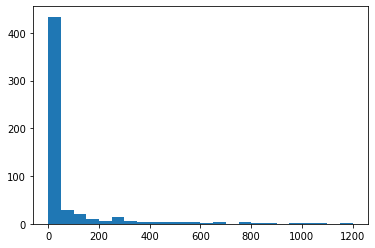

In [ ]:
plt.hist(train['len-2-trans'].value_counts(),bins = np.arange(0,1250,50))
plt.show()

In [ ]:
test['len-2-trans'].quantile([.8])

0.8    42.0
Name: len-2-trans, dtype: float64

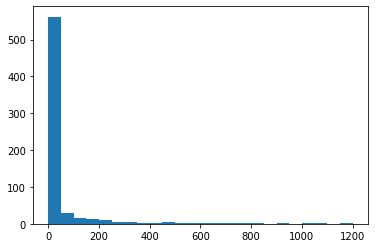

In [ ]:
plt.hist(test['len-2-trans'].value_counts(),bins = np.arange(0,1250,50))
plt.show()

In [ ]:
maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)

X_t.shape

(159571, 50)

In [ ]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
y.shape

(159571, 6)

-----------

# Pretrained-Embedding-matrix

In [ ]:
embedding_dict = dict()
f = open('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/glove.twitter.27B.200d.txt/glove.twitter.27B.200d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 200
    embedding_dict[word] = word_vector_arr
f.close()
print('There are %s Embedding Vectors\n' % len(embedding_dict))

print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 200)) # will delete first row

for word, i in tokenizer.word_index.items(): 
    temp = embedding_dict.get(word) 
    if temp is not None:
        embedding_matrix[i] = temp 

print(embedding_matrix.shape)
embedding_matrix = np.delete(embedding_matrix,0,axis=0) # delete first row
print(embedding_matrix.shape)

There are 1193514 Embedding Vectors

[-6.4748e-01 -3.7296e-01 -3.6128e-01  7.9975e-01 -2.1890e-01  7.6152e-01
 -7.3698e-02  2.2635e-01 -7.5429e-02  6.3600e-01 -6.5914e-01 -5.1787e-01
 -6.4411e-02 -3.0796e-01  4.4071e-01  1.4543e-01 -9.9792e-02 -2.3253e-01
  2.0882e-01 -9.3256e-02 -2.9659e-01 -1.6643e-01 -1.3184e-01 -5.5247e-01
 -6.0625e-01  9.6745e-01  3.8410e-01 -1.4236e-02  2.8774e-01  7.5652e-01
  1.1552e-01 -4.9894e-01 -9.2585e-02 -6.7708e-02  3.1373e-01  5.6426e-01
  1.9797e-01  4.0703e-02  2.7106e-01 -3.3045e-01  3.9652e-01  1.3718e-01
  5.0194e-01  3.7811e-01  2.9139e-01  2.6001e-01  2.9927e-01  3.6737e-01
  1.0638e-01  3.7086e-01  2.3767e-02  6.4266e-01 -2.4067e-01 -3.1749e-01
 -3.4070e-01  9.3053e-01  1.8900e-01 -2.7260e-01 -3.5132e-01  1.4086e-01
 -1.6232e-01  8.7983e-03 -8.7401e-02 -1.2887e-01  2.5303e-01  9.0737e-01
 -3.3149e-01  5.8059e-02 -2.3855e-01  3.5351e-01 -3.8560e-01 -4.6745e-01
 -2.2487e-01 -1.9058e-01  3.4685e-02  4.1231e-01  9.3602e-02  2.0409e-01
 -2.4806e-01  

In [ ]:
np.save('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy',embedding_matrix)

In [ ]:
embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
embedding_matrix.shape

(172069, 200)

-------------

# Model

In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=70
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
conc = add([conc, Dense(512, activation='relu')(conc)])
conc = add([conc, Dense(512, activation='relu')(conc)])
x = Dense(6, activation="sigmoid")(conc)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 64
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
2244/2244 [==============================] - 78s 19ms/step - loss: 0.1012 - accuracy: 0.9537 - val_loss: 0.0664 - val_accuracy: 0.9940

Epoch 00001: val_loss improved from inf to 0.06642, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
2244/2244 [==============================] - 41s 18ms/step - loss: 0.0632 - accuracy: 0.9935 - val_loss: 0.0603 - val_accuracy: 0.9936

Epoch 00002: val_loss improved from 0.06642 to 0.06033, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
2244/2244 [==============================] - 41s 18ms/step - loss: 0.0539 - accuracy: 0.9929 - val_loss: 0.0585 - val_accuracy: 0.9940

Epoch 00003: val_loss improved from 0.06033 to 0.05850, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-add-len-translated-prprocessing-pretrained-e

-----------

# Prediction

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

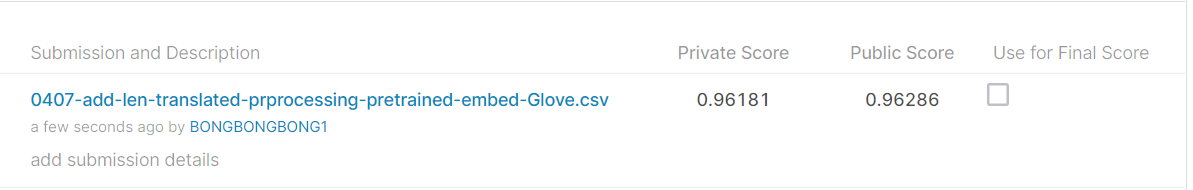

------------

# TO-DO



*   [data-aug](https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda)
*   [data-aug-2](https://www.kaggle.com/jpmiller/augmenting-the-data)



In [ ]:
print(np.argmax(train['len-2-trans']))
print(len(train['comment_text'][32143].split()))
train['comment_text'][32143]

32143
1250


'PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG

# Model change

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

In [ ]:
list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

In [ ]:
max_features = 100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
len(tokenizer.word_index)

172069

In [ ]:
maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)

X_t.shape

(159571, 50)

In [ ]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
y.shape

(159571, 6)

In [ ]:
embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
embedding_matrix.shape

(172069, 200)

In [ ]:
# new one 
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(50, activation="relu")(conc)
x = Dropout(0.2)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver2-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 64
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
2244/2244 [==============================] - 83s 22ms/step - loss: 0.1241 - accuracy: 0.7492 - val_loss: 0.0686 - val_accuracy: 0.9940

Epoch 00001: val_loss improved from inf to 0.06858, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver2-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
2244/2244 [==============================] - 48s 21ms/step - loss: 0.0643 - accuracy: 0.9938 - val_loss: 0.0620 - val_accuracy: 0.9940

Epoch 00002: val_loss improved from 0.06858 to 0.06205, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver2-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
2244/2244 [==============================] - 48s 21ms/step - loss: 0.0583 - accuracy: 0.9940 - val_loss: 0.0606 - val_accuracy: 0.9940

Epoch 00003: val_loss improved from 0.06205 to 0.06065, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver2-add-len-translated-prprocessi

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-ver2-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

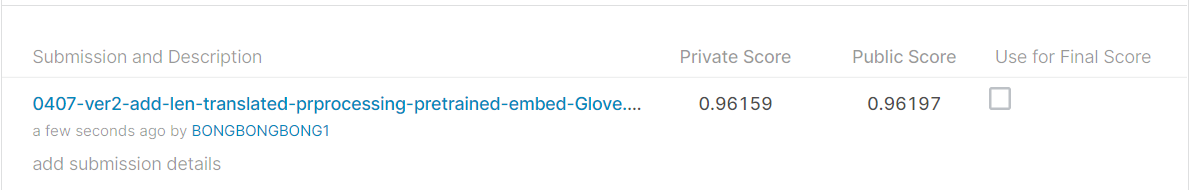

----------

# Model change

첫번째에서 LSTM 만 GRU 로 

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

max_features = 100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
print(len(tokenizer.word_index))

maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)
print(X_t.shape)

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
print(y.shape)

embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
print(embedding_matrix.shape)

172069
(159571, 50)
(159571, 6)
(172069, 200)


In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.1)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(512, activation="relu")(conc)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver3-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 64
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
2244/2244 [==============================] - 85s 23ms/step - loss: 0.1035 - accuracy: 0.9284 - val_loss: 0.0648 - val_accuracy: 0.9940

Epoch 00001: val_loss improved from inf to 0.06478, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver3-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
2244/2244 [==============================] - 50s 22ms/step - loss: 0.0603 - accuracy: 0.9937 - val_loss: 0.0619 - val_accuracy: 0.9940

Epoch 00002: val_loss improved from 0.06478 to 0.06195, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver3-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
2244/2244 [==============================] - 50s 22ms/step - loss: 0.0525 - accuracy: 0.9927 - val_loss: 0.0628 - val_accuracy: 0.9939

Epoch 00003: val_loss did not improve from 0.06195
Epoch 4/10
2244/2244 [==============================] - 49s 22ms/step - loss: 0.0462 - accuracy: 0.9922 - val_loss: 

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-ver3-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

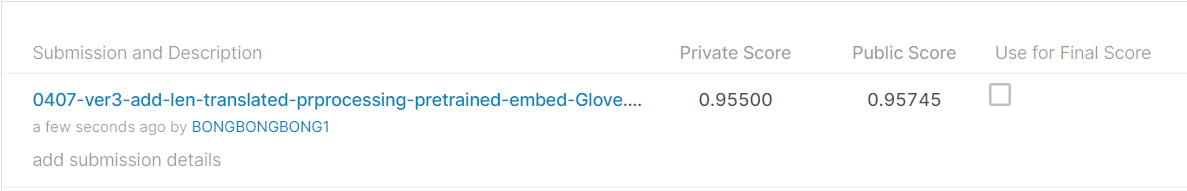

---------

# Model change

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

max_features = 100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
print(len(tokenizer.word_index))

maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)
print(X_t.shape)

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
print(y.shape)

embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
print(embedding_matrix.shape)

172069
(159571, 50)
(159571, 6)
(172069, 200)


In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Conv1D(64, 3, padding='valid', kernel_initializer='glorot_uniform')(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(128, activation="relu")(conc)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
1122/1122 [==============================] - 76s 39ms/step - loss: 0.1207 - accuracy: 0.8557 - val_loss: 0.0720 - val_accuracy: 0.9927

Epoch 00001: val_loss improved from inf to 0.07199, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
1122/1122 [==============================] - 42s 37ms/step - loss: 0.0665 - accuracy: 0.9909 - val_loss: 0.0629 - val_accuracy: 0.9937

Epoch 00002: val_loss improved from 0.07199 to 0.06293, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
1122/1122 [==============================] - 40s 36ms/step - loss: 0.0585 - accuracy: 0.9936 - val_loss: 0.0608 - val_accuracy: 0.9932

Epoch 00003: val_loss improved from 0.06293 to 0.06084, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-add-len-translated-prprocessi

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-ver4-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

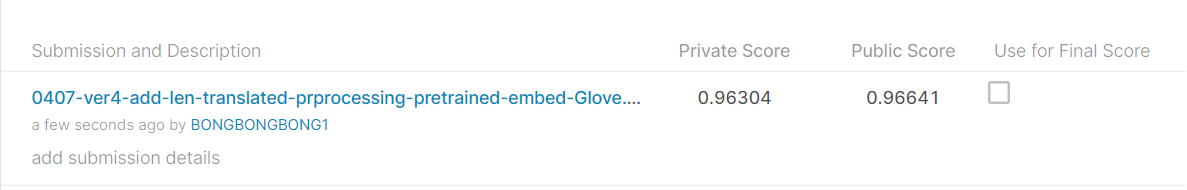

## HyperParameter change
__pad 50 -> 100__

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

max_features = 100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
print(len(tokenizer.word_index))

maxlen = 100
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 100)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 100)
print(X_t.shape)

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
print(y.shape)

embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
print(embedding_matrix.shape)

172069
(159571, 100)
(159571, 6)
(172069, 200)


In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=100
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Conv1D(64, 3, padding='valid', kernel_initializer='glorot_uniform')(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(128, activation="relu")(conc)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 100, 200)     0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 100, 256)     253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-1-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
1122/1122 [==============================] - 62s 24ms/step - loss: 0.1225 - accuracy: 0.8315 - val_loss: 0.0685 - val_accuracy: 0.9939

Epoch 00001: val_loss improved from inf to 0.06845, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-1-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
1122/1122 [==============================] - 27s 24ms/step - loss: 0.0659 - accuracy: 0.9923 - val_loss: 0.0624 - val_accuracy: 0.9937

Epoch 00002: val_loss improved from 0.06845 to 0.06236, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-1-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
1122/1122 [==============================] - 28s 25ms/step - loss: 0.0575 - accuracy: 0.9927 - val_loss: 0.0592 - val_accuracy: 0.9939

Epoch 00003: val_loss improved from 0.06236 to 0.05916, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-1-add-len-translated-prpr

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-ver4-1-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

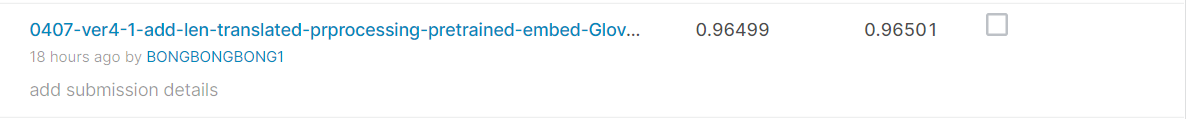

## HyperParameter change
max_features 100000 -> 30000

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

max_features = 30000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
print(len(tokenizer.word_index))

maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)
print(X_t.shape)

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
print(y.shape)

embedding_dict = dict()
f = open('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/glove.twitter.27B.200d.txt/glove.twitter.27B.200d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 200
    embedding_dict[word] = word_vector_arr
f.close()
print('There are %s Embedding Vectors\n' % len(embedding_dict))

print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 200)) # will delete first row

for word, i in tokenizer.word_index.items(): 
    temp = embedding_dict.get(word) 
    if temp is not None:
        embedding_matrix[i] = temp 

print(embedding_matrix.shape)
embedding_matrix = np.delete(embedding_matrix,0,axis=0) # delete first row
print(embedding_matrix.shape)

np.save('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-v2-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy',embedding_matrix)
embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-v2-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
print(embedding_matrix.shape)

172069
(159571, 50)
(159571, 6)
There are 1193514 Embedding Vectors

[-6.4748e-01 -3.7296e-01 -3.6128e-01  7.9975e-01 -2.1890e-01  7.6152e-01
 -7.3698e-02  2.2635e-01 -7.5429e-02  6.3600e-01 -6.5914e-01 -5.1787e-01
 -6.4411e-02 -3.0796e-01  4.4071e-01  1.4543e-01 -9.9792e-02 -2.3253e-01
  2.0882e-01 -9.3256e-02 -2.9659e-01 -1.6643e-01 -1.3184e-01 -5.5247e-01
 -6.0625e-01  9.6745e-01  3.8410e-01 -1.4236e-02  2.8774e-01  7.5652e-01
  1.1552e-01 -4.9894e-01 -9.2585e-02 -6.7708e-02  3.1373e-01  5.6426e-01
  1.9797e-01  4.0703e-02  2.7106e-01 -3.3045e-01  3.9652e-01  1.3718e-01
  5.0194e-01  3.7811e-01  2.9139e-01  2.6001e-01  2.9927e-01  3.6737e-01
  1.0638e-01  3.7086e-01  2.3767e-02  6.4266e-01 -2.4067e-01 -3.1749e-01
 -3.4070e-01  9.3053e-01  1.8900e-01 -2.7260e-01 -3.5132e-01  1.4086e-01
 -1.6232e-01  8.7983e-03 -8.7401e-02 -1.2887e-01  2.5303e-01  9.0737e-01
 -3.3149e-01  5.8059e-02 -2.3855e-01  3.5351e-01 -3.8560e-01 -4.6745e-01
 -2.2487e-01 -1.9058e-01  3.4685e-02  4.1231e-01  9.360

In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Conv1D(64, 3, padding='valid', kernel_initializer='glorot_uniform')(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(128, activation="relu")(conc)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-v2-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
1122/1122 [==============================] - 45s 36ms/step - loss: 0.1177 - accuracy: 0.8818 - val_loss: 0.0739 - val_accuracy: 0.9939

Epoch 00001: val_loss improved from inf to 0.07391, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-v2-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
1122/1122 [==============================] - 39s 34ms/step - loss: 0.0658 - accuracy: 0.9931 - val_loss: 0.0630 - val_accuracy: 0.9936

Epoch 00002: val_loss improved from 0.07391 to 0.06305, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-v2-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
1122/1122 [==============================] - 39s 35ms/step - loss: 0.0583 - accuracy: 0.9924 - val_loss: 0.0608 - val_accuracy: 0.9940

Epoch 00003: val_loss improved from 0.06305 to 0.06079, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver4-v2-add-len-translated-p

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-ver4-v2-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

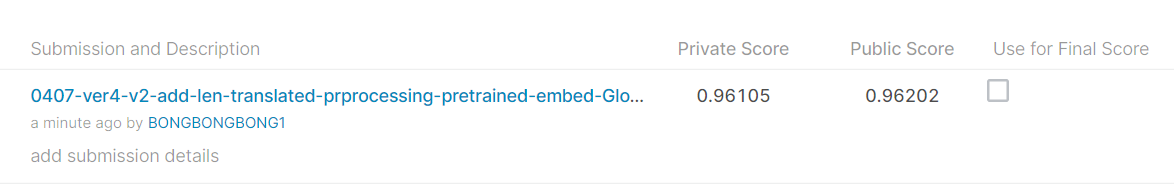

# Model change

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

max_features = 100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
print(len(tokenizer.word_index))

maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)
print(X_t.shape)

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
print(y.shape)

embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
print(embedding_matrix.shape)

172069
(159571, 50)
(159571, 6)
(172069, 200)


In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Conv1D(64, 3, padding='valid', kernel_initializer='glorot_uniform')(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
# x = Dense(128, activation="relu")(conc)
# x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(conc)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver5-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
1122/1122 [==============================] - 50s 14ms/step - loss: 0.1204 - accuracy: 0.8998 - val_loss: 0.0707 - val_accuracy: 0.9150

Epoch 00001: val_loss improved from inf to 0.07072, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver5-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
1122/1122 [==============================] - 14s 13ms/step - loss: 0.0666 - accuracy: 0.9635 - val_loss: 0.0644 - val_accuracy: 0.9872

Epoch 00002: val_loss improved from 0.07072 to 0.06435, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver5-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
1122/1122 [==============================] - 14s 13ms/step - loss: 0.0575 - accuracy: 0.9717 - val_loss: 0.0599 - val_accuracy: 0.9682

Epoch 00003: val_loss improved from 0.06435 to 0.05986, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver5-add-len-translated-prprocessi

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-ver5-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

In [ ]:
sample_submission.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.997454,8.024307e-01,0.993236,1.114920e-02,0.870292,5.834671e-02
1,0000247867823ef7,0.005612,1.613092e-04,0.001037,3.005685e-05,0.000554,9.758793e-05
2,00013b17ad220c46,0.010155,6.206642e-04,0.003435,2.243146e-05,0.010444,4.942929e-04
3,00017563c3f7919a,0.000210,4.369850e-06,0.000007,3.227965e-08,0.000006,4.160972e-07
4,00017695ad8997eb,0.006923,3.036718e-04,0.001986,9.485282e-05,0.007536,2.159966e-05
5,0001ea8717f6de06,0.000021,6.820403e-07,0.000023,1.308400e-07,0.000104,6.359019e-07
6,00024115d4cbde0f,0.000139,1.766999e-06,0.000020,4.558897e-05,0.000031,2.113271e-05
7,000247e83dcc1211,0.969068,2.110750e-03,0.329315,1.088337e-03,0.537903,2.027326e-02
8,00025358d4737918,0.016457,4.065183e-04,0.004085,3.924652e-06,0.011220,6.627421e-03
9,00026d1092fe71cc,0.000126,9.515875e-07,0.000007,7.526357e-07,0.000032,9.083359e-06


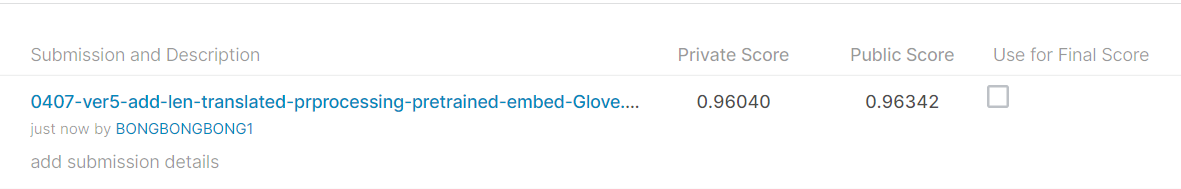

# Model change

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

max_features = 100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
print(len(tokenizer.word_index))

maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)
print(X_t.shape)

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
print(y.shape)

embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
print(embedding_matrix.shape)

172069
(159571, 50)
(159571, 6)
(172069, 200)


In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1))(x)
x = Conv1D(64, 3, padding='valid', kernel_initializer='glorot_uniform')(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(128, activation="relu")(conc)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver6-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
1122/1122 [==============================] - 19s 14ms/step - loss: 0.1225 - accuracy: 0.8410 - val_loss: 0.0705 - val_accuracy: 0.9939

Epoch 00001: val_loss improved from inf to 0.07047, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver6-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
1122/1122 [==============================] - 16s 14ms/step - loss: 0.0704 - accuracy: 0.9908 - val_loss: 0.0639 - val_accuracy: 0.9940

Epoch 00002: val_loss improved from 0.07047 to 0.06388, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver6-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
1122/1122 [==============================] - 16s 14ms/step - loss: 0.0622 - accuracy: 0.9939 - val_loss: 0.0626 - val_accuracy: 0.9939

Epoch 00003: val_loss improved from 0.06388 to 0.06264, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver6-add-len-translated-prprocessi

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-ver6-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

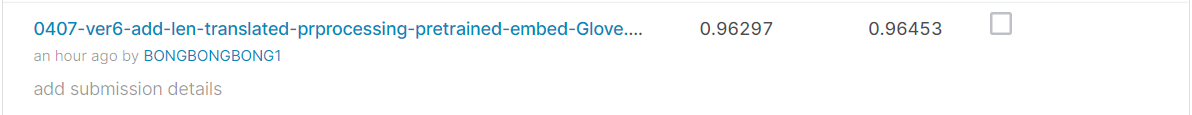

# Model change

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/0407-add-len-translated_test.csv')

list_sentences_train = train['2-trans'] # (159571,)
list_sentences_test = test['2-trans'] # (153164,)

max_features = 100000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
print(len(tokenizer.word_index))

maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)
print(X_t.shape)

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
print(y.shape)

embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0407-add-len-translated-preprocessing-200d-pretrained-embed-Glove.npy')
print(embedding_matrix.shape)

172069
(159571, 50)
(159571, 6)
(172069, 200)


In [ ]:
# new one 
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(6, activation="sigmoid")(conc)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      34413800    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      253440      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver7-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.1)

Epoch 1/10
1122/1122 [==============================] - 69s 33ms/step - loss: 0.1240 - accuracy: 0.9207 - val_loss: 0.0706 - val_accuracy: 0.9904

Epoch 00001: val_loss improved from inf to 0.07057, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver7-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
1122/1122 [==============================] - 35s 32ms/step - loss: 0.0671 - accuracy: 0.9861 - val_loss: 0.0650 - val_accuracy: 0.9932

Epoch 00002: val_loss improved from 0.07057 to 0.06502, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver7-add-len-translated-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
1122/1122 [==============================] - 35s 32ms/step - loss: 0.0583 - accuracy: 0.9794 - val_loss: 0.0610 - val_accuracy: 0.9903

Epoch 00003: val_loss improved from 0.06502 to 0.06103, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0407-ver7-add-len-translated-prprocessi

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0407-ver7-add-len-translated-prprocessing-pretrained-embed-Glove.csv", index=False)

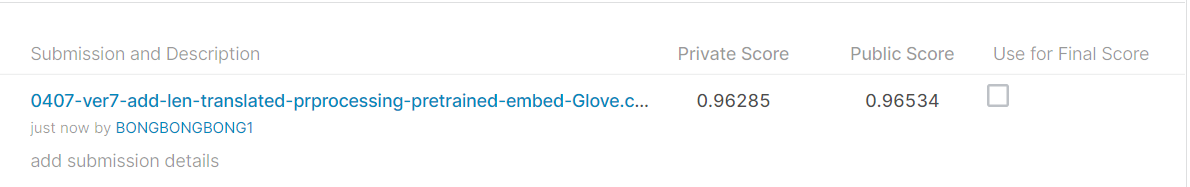